<a href="https://colab.research.google.com/github/denniss83/Bitcoin_ve_Ethereum_Fiyat_Volatilite_Analizi_2018_2025/blob/main/Bitcoin_ve_Ethereum_Fiyat_%26_Volatilite_Analizi_(2018%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin ve Ethereum Fiyat & Volatilite Analizi (2018–2025)

>⚠️ **Uyarı**
❗️ **Bu çalışma, Python programlama dili kullanılarak veri analizi becerilerini geliştirmek amacıyla hazırlanmıştır.
Gerçek yatırım tavsiyesi içermez. Hiçbir ticari amaç taşımamaktadır.**

Bu projede, 2018–2025 yılları arasında Bitcoin (BTC) ve Ethereum (ETH) kripto paralarının fiyat hareketleri analiz edilmiştir.
Amaç; zaman serisi üzerinden fiyat, getiri, volatilite ve korelasyon gibi temel yatırım metriklerini incelemek, bu iki dijital varlık arasında nasıl bir ilişki olduğunu ortaya koymaktır.

📌Proje kapsamında aşağıdaki analizler gerçekleştirilmiştir:

>Günlük, aylık ve yıllık getiri hesaplamaları

>Normalize fiyat ve kümülatif getiri karşılaştırmaları

>Volatilite (oynaklık) ve risk ölçümleri

>BTC–ETH arasındaki korelasyon (sabit ve zamanla değişen)

>Facebook Prophet ile 180 günlük ileriye dönük fiyat tahmini

📥 Veri Kaynağı ;

>Veriler, Yahoo Finance üzerinden yfinance Python kütüphanesi aracılığıyla alınmıştır:

>BTC-USD: Bitcoin'in Amerikan doları cinsinden günlük kapanış fiyatı

>ETH-USD: Ethereum'un Amerikan doları cinsinden günlük kapanış fiyatı

>Tarih Aralığı: 01.01.2018 – 01.07.2025

# 🔹 1. Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

# 🔹 2. BTC ve ETH Fiyat Verilerinin Çekilmesi (2018–2025)


In [2]:
start_date = "2018-01-01"
end_date = "2025-07-01"

btc = yf.download("BTC-USD", start=start_date, end=end_date)
eth = yf.download("ETH-USD", start=start_date, end=end_date)

btc.head(), eth.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(Price              Close          High           Low          Open  \
 Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
 Date                                                                 
 2018-01-01  13657.200195  14112.200195  13154.700195  14112.200195   
 2018-01-02  14982.099609  15444.599609  13163.599609  13625.000000   
 2018-01-03  15201.000000  15572.799805  14844.500000  14978.200195   
 2018-01-04  15599.200195  15739.700195  14522.200195  15270.700195   
 2018-01-05  17429.500000  17705.199219  15202.799805  15477.200195   
 
 Price            Volume  
 Ticker          BTC-USD  
 Date                     
 2018-01-01  10291200000  
 2018-01-02  16846600192  
 2018-01-03  16871900160  
 2018-01-04  21783199744  
 2018-01-05  23840899072  ,
 Price            Close         High         Low        Open      Volume
 Ticker         ETH-USD      ETH-USD     ETH-USD     ETH-USD     ETH-USD
 Date                                                              

## BTC ve ETH Verilerinin Kontrolü

In [3]:
print("BTC veri seti satır sayısı:", btc.shape[0])
print("ETH veri seti satır sayısı:", eth.shape[0])

print("\nBTC veri tipi ve boş değerler:")
print(btc.info())

print("\nETH veri tipi ve boş değerler:")
print(eth.info())

BTC veri seti satır sayısı: 2738
ETH veri seti satır sayısı: 2738

BTC veri tipi ve boş değerler:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2738 entries, 2018-01-01 to 2025-06-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2738 non-null   float64
 1   (High, BTC-USD)    2738 non-null   float64
 2   (Low, BTC-USD)     2738 non-null   float64
 3   (Open, BTC-USD)    2738 non-null   float64
 4   (Volume, BTC-USD)  2738 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.3 KB
None

ETH veri tipi ve boş değerler:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2738 entries, 2018-01-01 to 2025-06-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   2738 non-null   float64
 1   (High, ETH-USD)    2738 non-null   float64
 2   (Low, ETH-USD)     2738 non-null

# 📈 3. Fiyatların Görselleştirilmesi

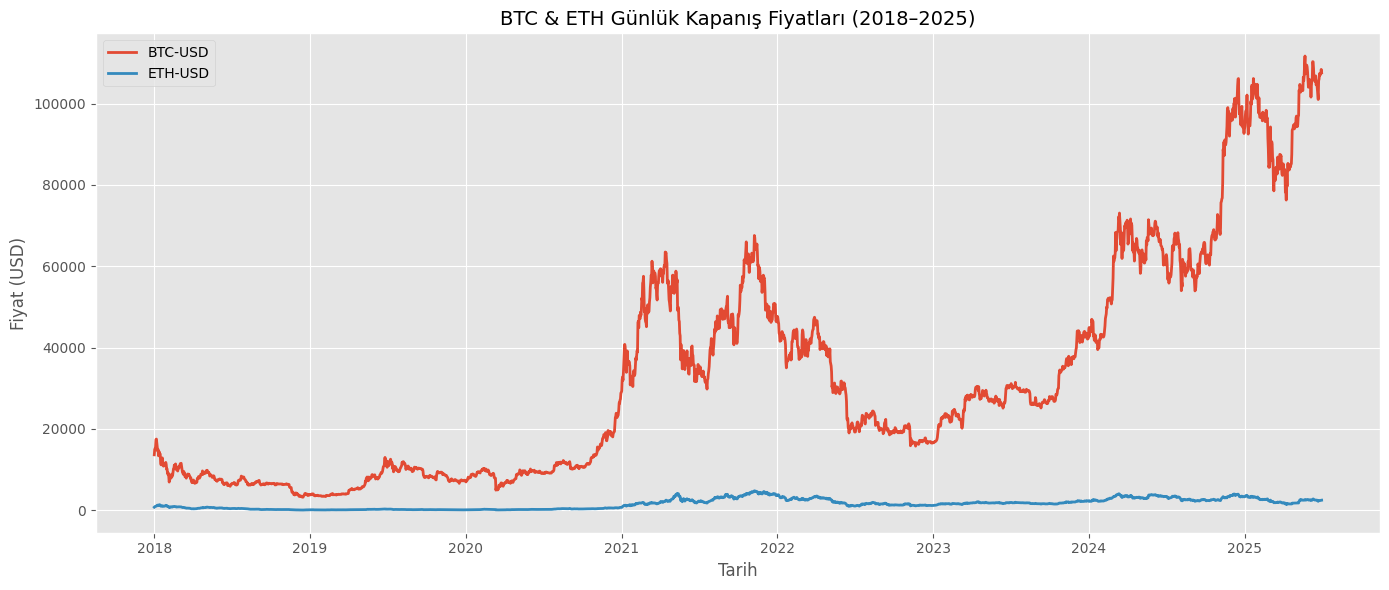

In [38]:
plt.figure(figsize=(14,6))
plt.plot(btc['Close'], label='BTC-USD', linewidth=2)
plt.plot(eth['Close'], label='ETH-USD', linewidth=2)
plt.title("BTC & ETH Günlük Kapanış Fiyatları (2018–2025)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 💹 4. Getiri Analizi

## A. Günlük Getiri (Daily Return)

In [39]:
btc['Daily Return'] = btc['Close'].pct_change()
eth['Daily Return'] = eth['Close'].pct_change()

## B. Aylık Getiri (Monthly Return)

In [40]:
btc['Month'] = btc.index.to_period('M')
eth['Month'] = eth.index.to_period('M')

btc_monthly = btc.groupby('Month')['Close'].last().pct_change()
eth_monthly = eth.groupby('Month')['Close'].last().pct_change()
btc_monthly.tail(10)

Price,Close
Ticker,BTC-USD
Month,
2024-09,0.073929
2024-10,0.108728
2024-11,0.373621
2024-12,-0.031310
2025-01,0.096071
2025-02,-0.176085
2025-03,-0.021619
2025-04,0.141230


 ## C. Yıllık Getiri (Annual Return)

In [41]:
btc['Year'] = btc.index.to_period('Y')
eth['Year'] = eth.index.to_period('Y')

btc_annual = btc.groupby('Year')['Close'].last().pct_change()
eth_annual = eth.groupby('Year')['Close'].last().pct_change()
btc_annual.tail(10)

Price,Close
Ticker,BTC-USD
Year,
2018,NaN
2019,0.922034
2020,3.031601
2021,0.596679
2022,-0.642652
2023,1.554174
2024,1.210547
2025,0.151119


## D. Kümülatif Getiri (Cumulative Return)

In [10]:
btc['Cumulative Return'] = (1 + btc['Daily Return']).cumprod()
eth['Cumulative Return'] = (1 + eth['Daily Return']).cumprod()

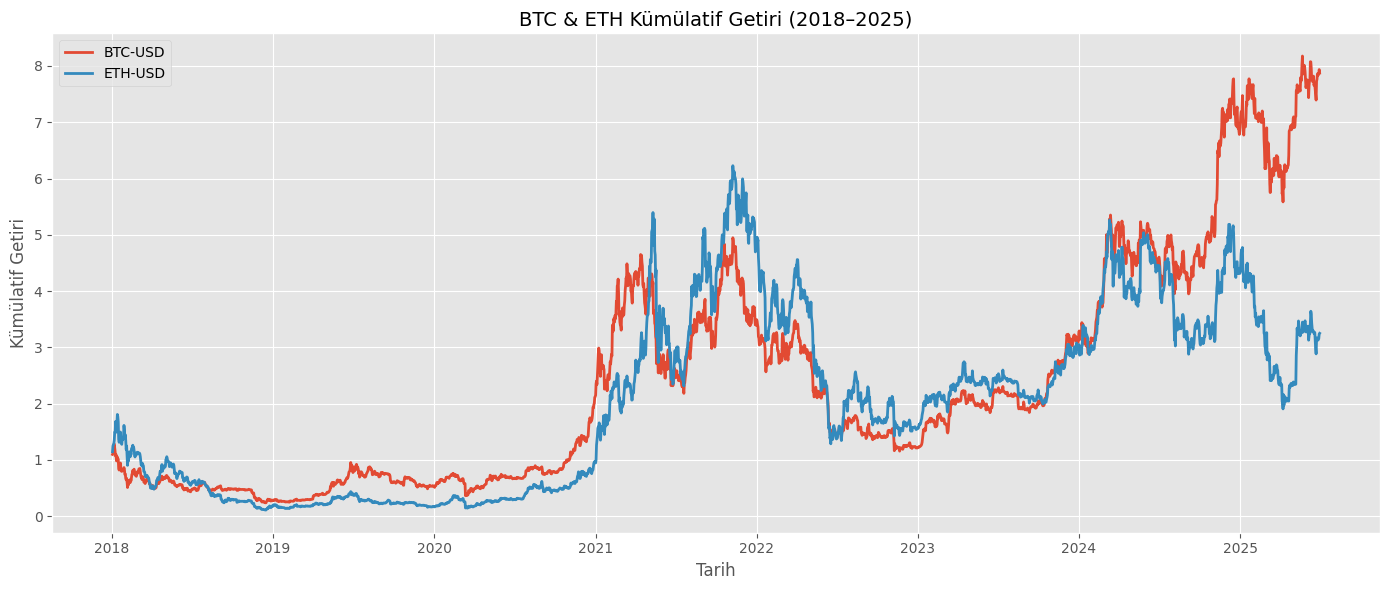

In [11]:
plt.figure(figsize=(14,6))
plt.plot(btc['Cumulative Return'], label='BTC-USD', linewidth=2)
plt.plot(eth['Cumulative Return'], label='ETH-USD', linewidth=2)
plt.title("BTC & ETH Kümülatif Getiri (2018–2025)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Kümülatif Getiri")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔻 5. Volatilite ve Risk Analizi

 ## A. Günlük Volatilite (Standart Sapma)

In [12]:
btc_vol_daily = btc['Daily Return'].std()
eth_vol_daily = eth['Daily Return'].std()

print(f"BTC Günlük Volatilite: {btc_vol_daily:.4f}")
print(f"ETH Günlük Volatilite: {eth_vol_daily:.4f}")

BTC Günlük Volatilite: 0.0347
ETH Günlük Volatilite: 0.0450


## B. Yıllıklaştırılmış Volatilite (Günlük x √252)

In [13]:
btc_vol_annual = btc_vol_daily * np.sqrt(252)
eth_vol_annual = eth_vol_daily * np.sqrt(252)

print(f"BTC Yıllık Volatilite: {btc_vol_annual:.2%}")
print(f"ETH Yıllık Volatilite: {eth_vol_annual:.2%}")

BTC Yıllık Volatilite: 55.02%
ETH Yıllık Volatilite: 71.37%


Standart volatilite hesaplamalarında yıllıklaştırma yapılırken √252 kullanılır

 ## C. Zamanla Değişen Volatilite (Rolling Volatility)

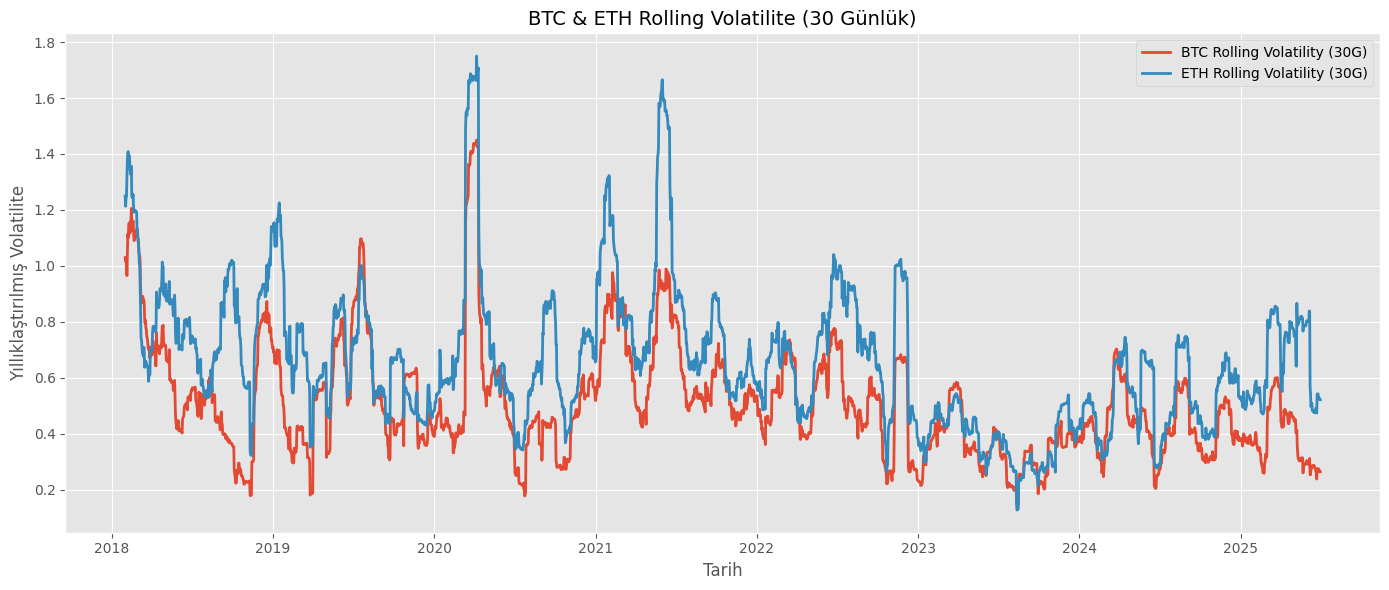

In [14]:
btc['Rolling Volatility'] = btc['Daily Return'].rolling(window=30).std() * np.sqrt(252)
eth['Rolling Volatility'] = eth['Daily Return'].rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(14,6))
plt.plot(btc['Rolling Volatility'], label='BTC Rolling Volatility (30G)', linewidth=2)
plt.plot(eth['Rolling Volatility'], label='ETH Rolling Volatility (30G)', linewidth=2)
plt.title("BTC & ETH Rolling Volatilite (30 Günlük)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Yıllıklaştırılmış Volatilite")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---


Volatilite yüksekse → fiyat daha çok dalgalanır, risklidir

Yatırımcılar genellikle düşük volatilite ama yüksek getiri ister

ETH genelde BTC'den biraz daha oynaktır ama dönemsel değişebilir


---



# 🔗 6. Korelasyon Analizi

##  A. Günlük Getiriler Arasındaki Korelasyon

In [15]:
correlation = btc['Daily Return'].corr(eth['Daily Return'])
print(f"BTC ve ETH günlük getiriler korelasyonu: {correlation:.2f}")

BTC ve ETH günlük getiriler korelasyonu: 0.82


##  B. Korelasyon Isı Haritası (Heatmap)

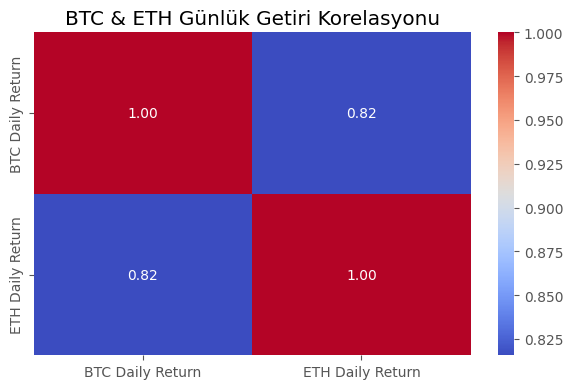

In [16]:
returns_df = pd.DataFrame({
    'BTC Daily Return': btc['Daily Return'],
    'ETH Daily Return': eth['Daily Return']
})

plt.figure(figsize=(6,4))
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("BTC & ETH Günlük Getiri Korelasyonu")
plt.tight_layout()
plt.show()

BTC ve ETH, günlük bazda oldukça paralel hareket ediyor. Portföy çeşitlendirmesi yapmak isteyen biri için bu yüksek korelasyon avantaj değil, risk olabilir. Ancak bu ilişki zamanla değişebilir – o yüzden rolling correlation da incelendi

##  C. Zamanla Değişen Korelasyon (Rolling Correlation)

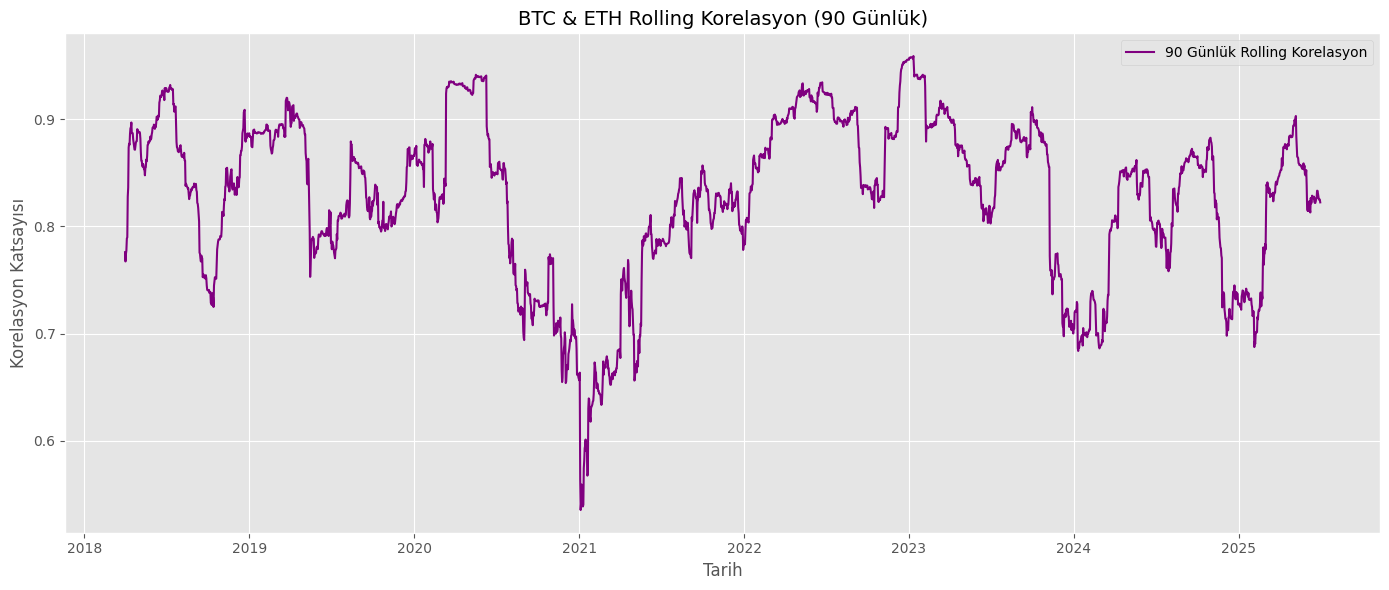

In [17]:
rolling_corr = returns_df['BTC Daily Return'].rolling(window=90).corr(returns_df['ETH Daily Return'])

plt.figure(figsize=(14,6))
plt.plot(rolling_corr, label='90 Günlük Rolling Korelasyon', color='purple')
plt.title("BTC & ETH Rolling Korelasyon (90 Günlük)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Korelasyon Katsayısı")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



---


Korelasyon > 0.8 ise çok yüksek, < 0.5 ise zayıf kabul edilir

BTC–ETH genellikle pozitif korelasyonludur ama zamanla değişebilir

Korelasyon düştüğünde portföy çeşitlendirmesi açısından avantaj doğabilir


---



# 🔮 7. Gelecek Fiyat Tahmini (Facebook Prophet ile)

In [28]:
!pip install prophet --quiet

In [29]:
from prophet import Prophet

btc_prophet = btc.reset_index()[['Date', 'Close']]
btc_prophet.columns = ['ds', 'y']


## 🔮 Bitcoin 180 Günlük Fiyat Tahmini (Prophet)

In [35]:
btc_model = Prophet()
btc_model.fit(btc_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz0ys2g5l/m7vtk1ut.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz0ys2g5l/nzwqu9vg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23763', 'data', 'file=/tmp/tmpz0ys2g5l/m7vtk1ut.json', 'init=/tmp/tmpz0ys2g5l/nzwqu9vg.json', 'output', 'file=/tmp/tmpz0ys2g5l/prophet_modelquupln6o/prophet_model-20250630202939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
future = btc_model.make_future_dataframe(periods=180)
forecast = btc_model.predict(future)

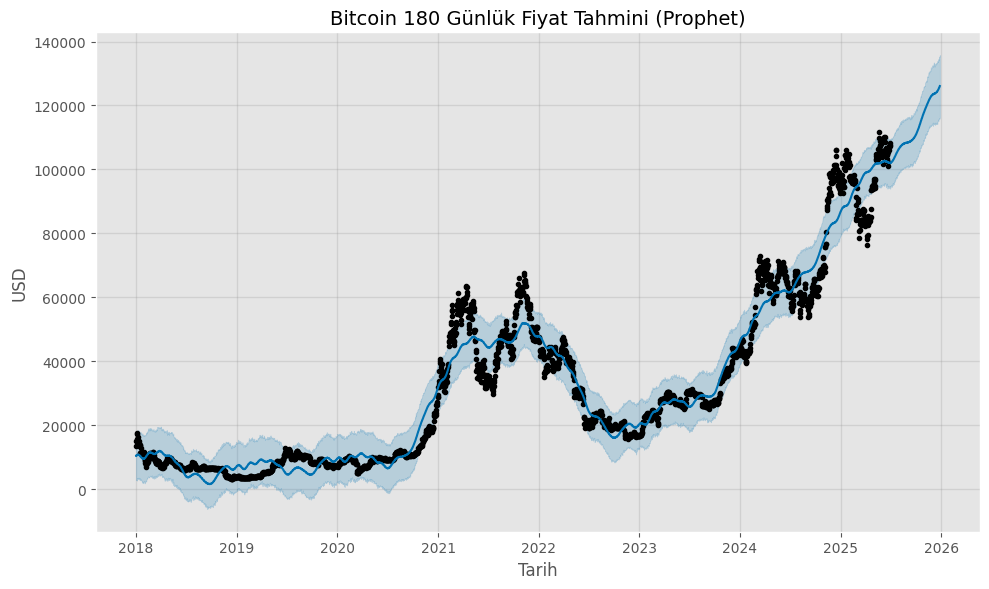

In [37]:
fig = btc_model.plot(forecast)
plt.title("Bitcoin 180 Günlük Fiyat Tahmini (Prophet)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()



---


Grafikte siyah nokta → Gerçek veri

Mavi çizgi → Tahmin

Açık mavi alan → Belirsizlik bandı (confidence interval)


---



## 🔮 Ethereum 180 Günlük Fiyat Tahmini (Prophet)

In [31]:
eth_prophet = eth.reset_index()[['Date', 'Close']]
eth_prophet.columns = ['ds', 'y']

In [32]:
eth_model = Prophet()
eth_model.fit(eth_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz0ys2g5l/4zov2qpk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz0ys2g5l/5nttyb7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52497', 'data', 'file=/tmp/tmpz0ys2g5l/4zov2qpk.json', 'init=/tmp/tmpz0ys2g5l/5nttyb7a.json', 'output', 'file=/tmp/tmpz0ys2g5l/prophet_model0r_sq9o9/prophet_model-20250630202817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
future_eth = eth_model.make_future_dataframe(periods=180)
forecast_eth = eth_model.predict(future_eth)

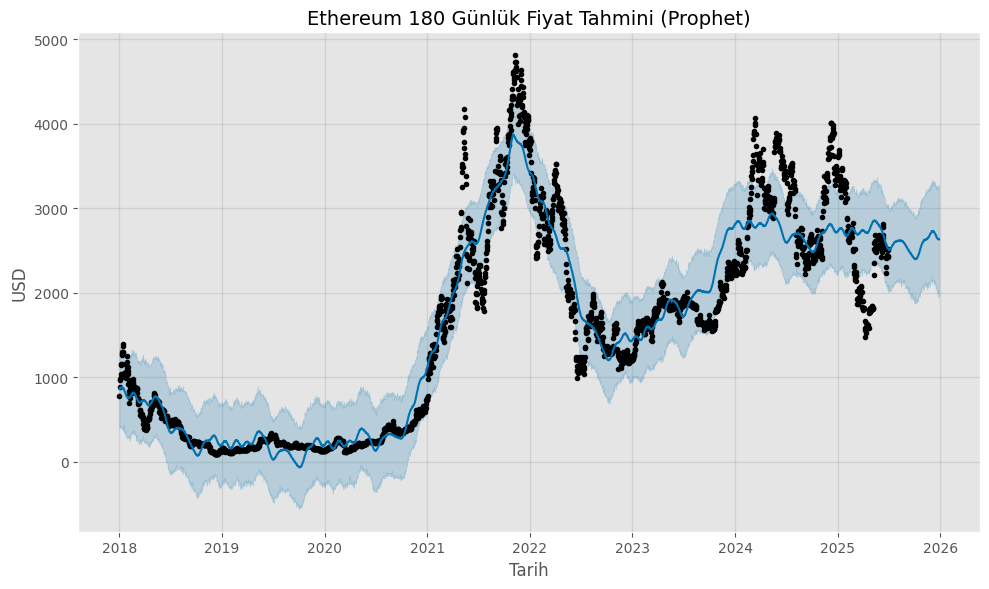

In [34]:
fig = eth_model.plot(forecast_eth)
plt.title("Ethereum 180 Günlük Fiyat Tahmini (Prophet)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()



---


Grafikte siyah nokta → Gerçek veri

Mavi çizgi → Tahmin

Açık mavi alan → Belirsizlik bandı (confidence interval)


---



